<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-Mastery-with-Python/blob/main/5.%20Prepare%20Your%20Data%20For%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prepare Your Data For Machine Learning**

Many machine learning algorithms make assumptions about your data. It is often a very good idea to prepare your data in such a way to best expose the structure of the problem to the machine learning algorithms that you intend to use. In this chapter you will discover how to prepare your data for machine learning in Python using scikit-learn. After completing this lesson you will know how to:

1. Rescale data.
2. Standardize data.
3. Normalize data.
4. Binarize data.

**5.1 Need For Data Pre-processing**

You almost always need to pre-process your data. It is a required step. A difficulty is that different algorithms make different assumptions about your data and may require different transforms. Further, when you follow all of the rules and prepare your data, sometimes algorithms can deliver better results without pre-processing.
Generally, I would recommend creating many different views and transforms of your data, then exercise a handful of algorithms on each view of your dataset. This will help you to flush out which data transforms might be better at exposing the structure of your problem in general.

**5.2 Data Transforms**

In this lesson you will work through 4 different data pre-processing recipes for machine learning. The Pima Indian diabetes dataset is used in each recipe. Each recipe follows the same structure:

•	Load the dataset from a URL.

•	Split the dataset into the input and output variables for machine learning.

•	Apply a pre-processing transform to the input variables.

•	Summarize the data to show the change.

The scikit-learn library provides two standard idioms for transforming data. Each are useful in different circumstances. The transforms are calculated in such a way that they can be applied to your training data and any samples of data you may have in the future. The scikit-learn documentation has some information on how to use various different pre-processing methods:

•	Fit and Multiple Transform.

•	Combined Fit-And-Transform.

The Fit and Multiple Transform method is the preferred approach. You call the fit() function to prepare the parameters of the transform once on your data. Then later you can use the transform() function on the same data to prepare it for modeling and again on the test or validation dataset or new data that you may see in the future. The Combined Fit-And-Transform is a convenience that you can use for one off tasks. This might be useful if you are interested in plotting or summarizing the transformed data.

**5.3 Rescale Data**

When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale. Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1. This is useful for optimization algorithms used in the core of machine learning algorithms like gradient descent. It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like k-Nearest Neighbors. You can rescale your data using scikit-learn using the MinMaxScaler class.


In [ ]:
# Rescale data (between 0 and 1)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

After rescaling you can see that all of the values are in the range between 0 and 1.

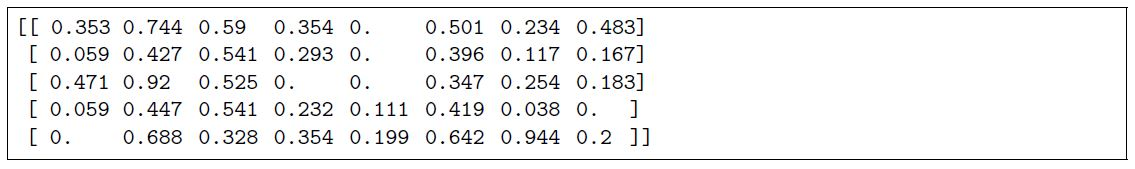

**5.4 Standardize Data**

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis. You can standardize data using scikit-learn with the StandardScaler class.


In [ ]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

The values for each attribute now have a mean value of 0 and a standard deviation of 1.

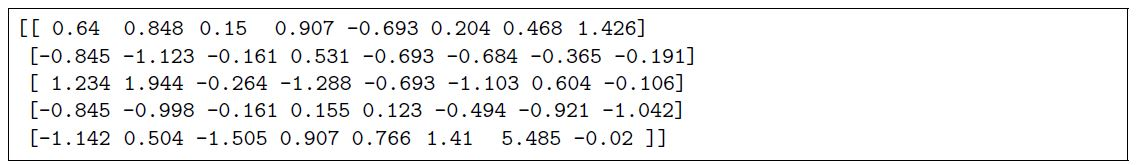

**5.5 Normalize Data**

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra). This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors. You can normalize data in Python with scikit-learn using the Normalizer class.


In [ ]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

The rows are normalized to length 1.

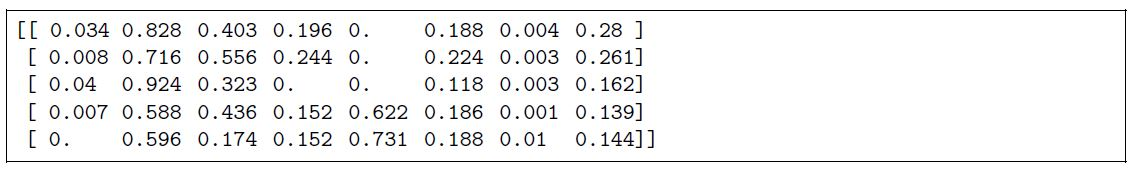

**5.6 Binarize Data (Make Binary)**

You can transform your data using a binary threshold. All values above the threshold are marked 1 and all equal to or below are marked as 0. This is called binarizing your data or thresholding your data. It can be useful when you have probabilities that you want to make crisp values. It is also useful when feature engineering and you want to add new features that indicate something meaningful. You can create new binary attributes in Python using scikit-learn with the Binarizer class.


In [ ]:
# binarization
from sklearn.preprocessing import Binarizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

You can see that all values equal or less than 0 are marked 0 and all of those above 0 are marked 1.

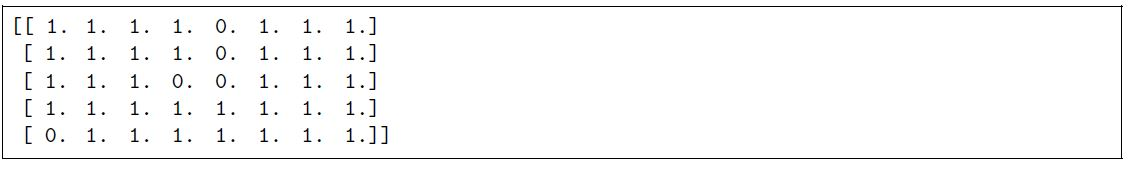